In [1]:
#importing required packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [2]:
train=pd.read_csv('Train_Data.csv')  #importing training dataset
test=pd.read_csv('Test_Data.csv')  #importing testing dataset

In [3]:
train.head(10)  #reading the first 10 values of training dataset

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
0        1               0.271267  52.281993   0.1  236.428943   
1        1               0.361690  54.986671   0.2  236.428943   
2        1               0.000000  55.424786   0.3  236.428943   
3        1               2.622251  55.524146   0.4  236.428943   
4        1               3.888165  55.852018   0.5  236.428943   
5        1               4.521122  56.130203   0.6  236.428943   
6        1               4.521122  56.150070   0.7  236.428943   
7        1               4.521122  56.090457   0.8  236.428943   
8        1               5.787037  55.583759   0.9  236.428943   
9        1               4.521122  56.100397   1.0  236.428943   

                               Dust   RUL  
0  ISO 12103-1, A3 Medium Test Dust  58.9  
1  ISO 12103-1, A3 Medium Test Dust  58.8  
2  ISO 12103-1, A3 Medium Test Dust  58.7  
3  ISO 12103-1, A3 Medium Test Dust  58.6  
4  ISO 12103-1, A3 Medium Test Dust  58.5  
5  ISO 12103-1, A3 Medium Test Dust  58.4  
6  ISO 12103-1, A3 Medium Test Dust  58.3  
7  ISO 12103-1, A3 Medium Test Dust  58.2  
8  ISO 12103-1, A3 Medium Test Dust  58.1  
9  ISO 12103-1, A3 Medium Test Dust  58.0

In [4]:
train.describe()  #description of training dataset

Data_No  Differential_pressure     Flow_rate          Time  \
count  39414.000000           39414.000000  39414.000000  39414.000000   
mean      24.448775              93.204439     73.172012     67.377812   
std       12.689146             120.463934     11.400250     61.810131   
min        1.000000               0.000000      0.000000      0.100000   
25%       15.000000              12.478300     58.634074     19.900000   
50%       24.000000              41.503910     80.717290     45.900000   
75%       31.000000             123.878800     81.711670     99.100000   
max       50.000000             574.996400     84.244737    258.100000   

          Dust_feed           RUL  
count  39414.000000  39414.000000  
mean     126.295097    111.489605  
std       80.632092     74.140618  
min       59.107236      1.900000  
25%       59.107236     50.500000  
50%       79.246266     93.500000  
75%      158.492533    163.700000  
max      316.985065    335.100000

In [5]:
print('Total Rows:',train.shape[0])  #counting the total number of rows in training dataset
print('Total Columns:',train.shape[1])  #counting the total number of columns in training dataset

Total Rows: 39414
Total Columns: 7


In [6]:
train.info()  #printing the information of training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39414 entries, 0 to 39413
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data_No                39414 non-null  int64  
 1   Differential_pressure  39414 non-null  float64
 2   Flow_rate              39414 non-null  float64
 3   Time                   39414 non-null  float64
 4   Dust_feed              39414 non-null  float64
 5   Dust                   39414 non-null  object 
 6   RUL                    39414 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [7]:
test.head(10)  #reading the first 10 values of testing dataset

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
0        1                    0.0        0.0   0.1  236.428943   
1        1                    0.0        0.0   0.2  236.428943   
2        1                    0.0        0.0   0.3  236.428943   
3        1                    0.0        0.0   0.4  236.428943   
4        1                    0.0        0.0   0.5  236.428943   
5        1                    0.0        0.0   0.6  236.428943   
6        1                    0.0        0.0   0.7  236.428943   
7        1                    0.0        0.0   0.8  236.428943   
8        1                    0.0        0.0   0.9  236.428943   
9        1                    0.0        0.0   1.0  236.428943   

                               Dust  
0  ISO 12103-1, A3 Medium Test Dust  
1  ISO 12103-1, A3 Medium Test Dust  
2  ISO 12103-1, A3 Medium Test Dust  
3  ISO 12103-1, A3 Medium Test Dust  
4  ISO 12103-1, A3 Medium Test Dust  
5  ISO 12103-1, A3 Medium Test Dust  
6  ISO 12103-1, A3 Medium Test Dust  
7  ISO 12103-1, A3 Medium Test Dust  
8  ISO 12103-1, A3 Medium Test Dust  
9  ISO 12103-1, A3 Medium Test Dust

In [8]:
test.describe() #description of testing dataset

Data_No  Differential_pressure     Flow_rate          Time  \
count  39420.000000           39420.000000  39420.000000  39420.000000   
mean      25.167453              78.232050     66.095780     49.135490   
std       14.315149             107.342894     11.306582     39.088269   
min        1.000000               0.000000      0.000000      0.100000   
25%       12.000000               8.590133     58.458498     19.800000   
50%       24.000000              35.174340     59.040107     39.900000   
75%       38.000000             102.358200     81.136739     65.800000   
max       50.000000             607.910200     84.199355    179.400000   

          Dust_feed  
count  39420.000000  
mean     132.247854  
std       62.716754  
min       59.107236  
25%       79.246266  
50%      118.214472  
75%      158.492533  
max      316.985065

In [9]:
print('Total Rows:',test.shape[0])  #counting the total number of rows in testing dataset
print('Total Columns:',test.shape[1])  #counting the total number of columns in testing dataset

Total Rows: 39420
Total Columns: 6


In [10]:
test.info()  #printing the information of testing dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39420 entries, 0 to 39419
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data_No                39420 non-null  int64  
 1   Differential_pressure  39420 non-null  float64
 2   Flow_rate              39420 non-null  float64
 3   Time                   39420 non-null  float64
 4   Dust_feed              39420 non-null  float64
 5   Dust                   39420 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ MB


In [11]:
train['Source']='Train'  #adding extra column 'Source' with value 'Train' in training dataset
test['Source']='Test'  #adding extra column 'Source' with value 'Test' in testing dataset

In [12]:
dataset=pd.concat([train,test], ignore_index=True)  #concatenating training and testing dataset into a single dataset

In [13]:
dataset.head(10)  #reading the first 10 values of combined dataset

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
0        1               0.271267  52.281993   0.1  236.428943   
1        1               0.361690  54.986671   0.2  236.428943   
2        1               0.000000  55.424786   0.3  236.428943   
3        1               2.622251  55.524146   0.4  236.428943   
4        1               3.888165  55.852018   0.5  236.428943   
5        1               4.521122  56.130203   0.6  236.428943   
6        1               4.521122  56.150070   0.7  236.428943   
7        1               4.521122  56.090457   0.8  236.428943   
8        1               5.787037  55.583759   0.9  236.428943   
9        1               4.521122  56.100397   1.0  236.428943   

                               Dust   RUL Source  
0  ISO 12103-1, A3 Medium Test Dust  58.9  Train  
1  ISO 12103-1, A3 Medium Test Dust  58.8  Train  
2  ISO 12103-1, A3 Medium Test Dust  58.7  Train  
3  ISO 12103-1, A3 Medium Test Dust  58.6  Train  
4  ISO 12103-1, A3 Medium Test Dust  58.5  Train  
5  ISO 12103-1, A3 Medium Test Dust  58.4  Train  
6  ISO 12103-1, A3 Medium Test Dust  58.3  Train  
7  ISO 12103-1, A3 Medium Test Dust  58.2  Train  
8  ISO 12103-1, A3 Medium Test Dust  58.1  Train  
9  ISO 12103-1, A3 Medium Test Dust  58.0  Train

In [14]:
dataset.tail(10)  #reading the last 10 values of combined dataset

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
78824       50               355.1794  58.568230  58.9  177.321707   
78825       50               353.5518  58.447519  59.0  177.321707   
78826       50               353.2805  58.513364  59.1  177.321707   
78827       50               355.1794  58.557265  59.2  177.321707   
78828       50               358.3442  58.557265  59.3  177.321707   
78829       50               359.9718  58.721877  59.4  177.321707   
78830       50               360.7856  58.699919  59.5  177.321707   
78831       50               361.5090  58.743820  59.6  177.321707   
78832       50               362.0515  58.601152  59.7  177.321707   
78833       50               366.4822  58.612131  59.8  177.321707   

                                   Dust  RUL Source  
78824  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78825  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78826  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78827  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78828  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78829  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78830  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78831  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78832  ISO 12103-1, A4 Coarse Test Dust  NaN   Test  
78833  ISO 12103-1, A4 Coarse Test Dust  NaN   Test

In [15]:
print('Total Rows:',dataset.shape[0])  #counting the total number of rows in combined dataset
print('Total Columns:',dataset.shape[1])  #counting the total number of columns in training dataset

Total Rows: 78834
Total Columns: 8


In [16]:
dataset.describe()  #description of combined dataset

Data_No  Differential_pressure     Flow_rate          Time  \
count  78834.000000           78834.000000  78834.000000  78834.000000   
mean      24.808141              85.717675     69.633627     58.255957   
std       13.531351             114.336315     11.891970     52.509694   
min        1.000000               0.000000      0.000000      0.100000   
25%       14.000000              10.579430     58.491421     19.800000   
50%       24.000000              38.339120     59.992983     42.200000   
75%       34.000000             112.485500     81.542575     80.200000   
max       50.000000             607.910200     84.244737    258.100000   

          Dust_feed           RUL  
count  78834.000000  39414.000000  
mean     129.271702    111.489605  
std       72.292169     74.140618  
min       59.107236      1.900000  
25%       59.107236     50.500000  
50%      118.214472     93.500000  
75%      158.492533    163.700000  
max      316.985065    335.100000

In [17]:
#printing the percentage of training dataset in combined dataset
print("Training Dataset :",dataset["RUL"].notnull().sum()/dataset.shape[0]*100,"%")

Training Dataset : 49.996194535352764 %


In [18]:
#printing the percentage of testing dataset in combined dataset
print("Training Dataset :",dataset["RUL"].isnull().sum()/dataset.shape[0]*100,"%")

Training Dataset : 50.003805464647236 %


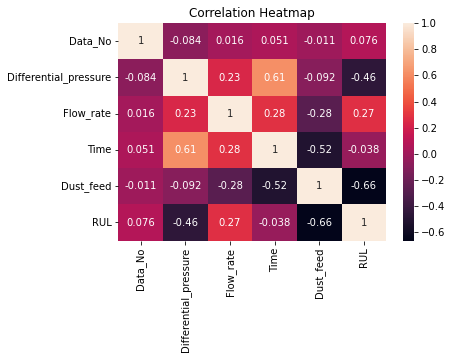

In [19]:
#HeatMap 
df=dataset  #copying the dataset
sns.heatmap(df.corr(), annot=True)  #creating a heatmap of correlation matrix and annot=True will display the correlation values within each cell of the heatmap
plt.title('Correlation Heatmap')  #title of heatmap
plt.show()  #plotting the heatmap

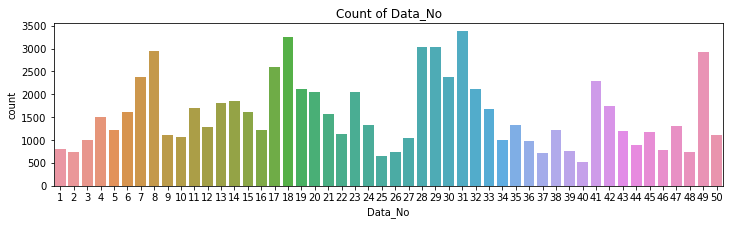

In [20]:
plt.figure(figsize=(12,3))  #setting the size of plot
sns.countplot(x='Data_No', data=df)  #creating a count plot
plt.title('Count of Data_No')  #adding a title to the plot
plt.show()  #displaying the plot

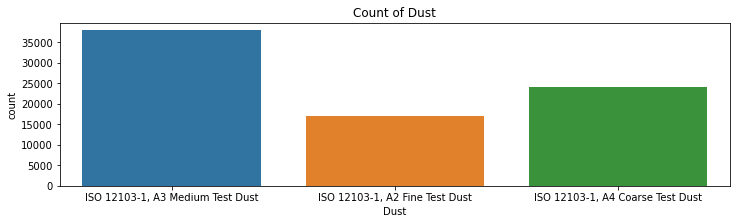

In [21]:
plt.figure(figsize=(12,3))  #setting the size of the plot
sns.countplot(x='Dust', data=df)  #creating a count plot
plt.title('Count of Dust')  #adding a title to the plot 
plt.show()  #displaying the plot

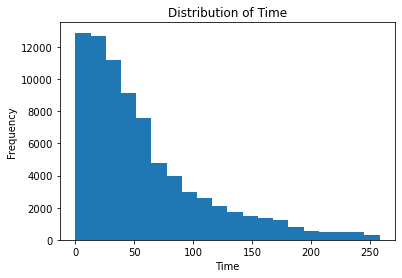

In [22]:
plt.hist(df['Time'], bins=20)  #creating a histogram with 20 bins for the 'Time' column
plt.xlabel('Time')  #adding a label for the x-axis
plt.ylabel('Frequency')   #adding a label for the y-axis
plt.title('Distribution of Time')   #adding a title to the plot
plt.show()  #displaying the plot

Text(0.5, 1.0, 'Flow Rate Variation over Time for Different Data_No')

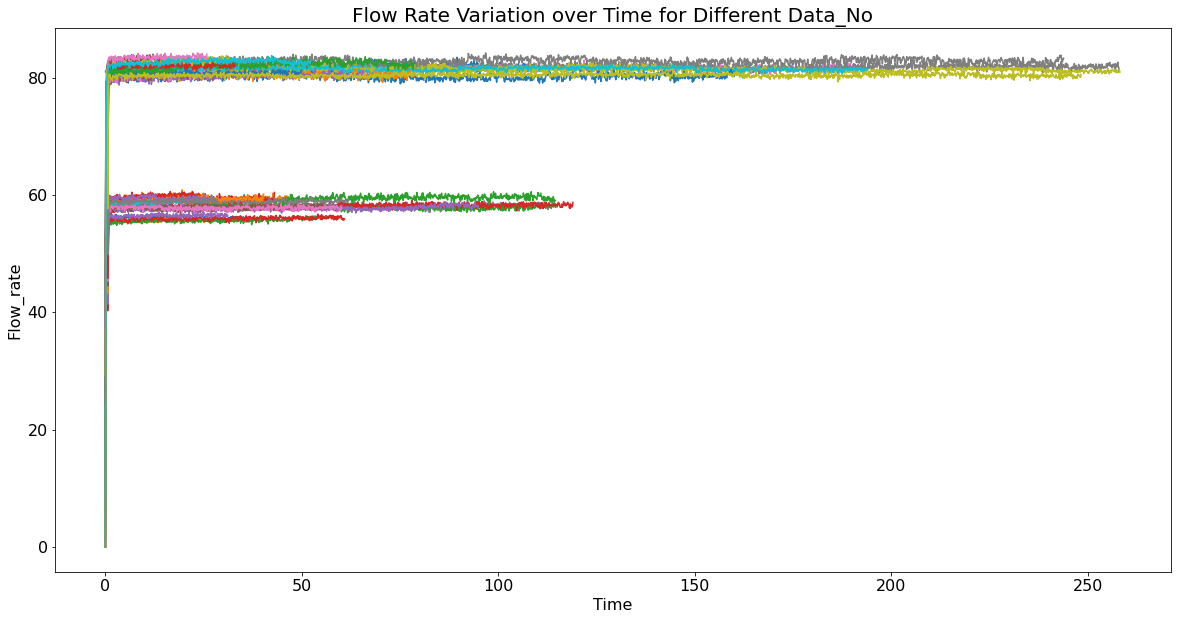

In [23]:
df=train  #copying the train dataset
plt.figure(figsize = (20,10))  #setting the size of the plot
# Grouping the DataFrame by 'Data_No' and iterating over the groups
for data_no, df in df.groupby('Data_No'):
    plt.plot(df['Time'], df['Flow_rate'])  #creating a line plot for each group
plt.xlabel('Time', fontsize=16)   #adding a label for the x-axis
plt.ylabel('Flow_rate', fontsize=16)   #adding a label for the y-axis
plt.tick_params(axis='both', labelsize=16)  #setting the label size 
plt.title('Flow Rate Variation over Time for Different Data_No', fontsize=20)  #adding a title to the plot

Text(0.5, 1.0, 'Flow Rate Variation over Time for Different Data_No')

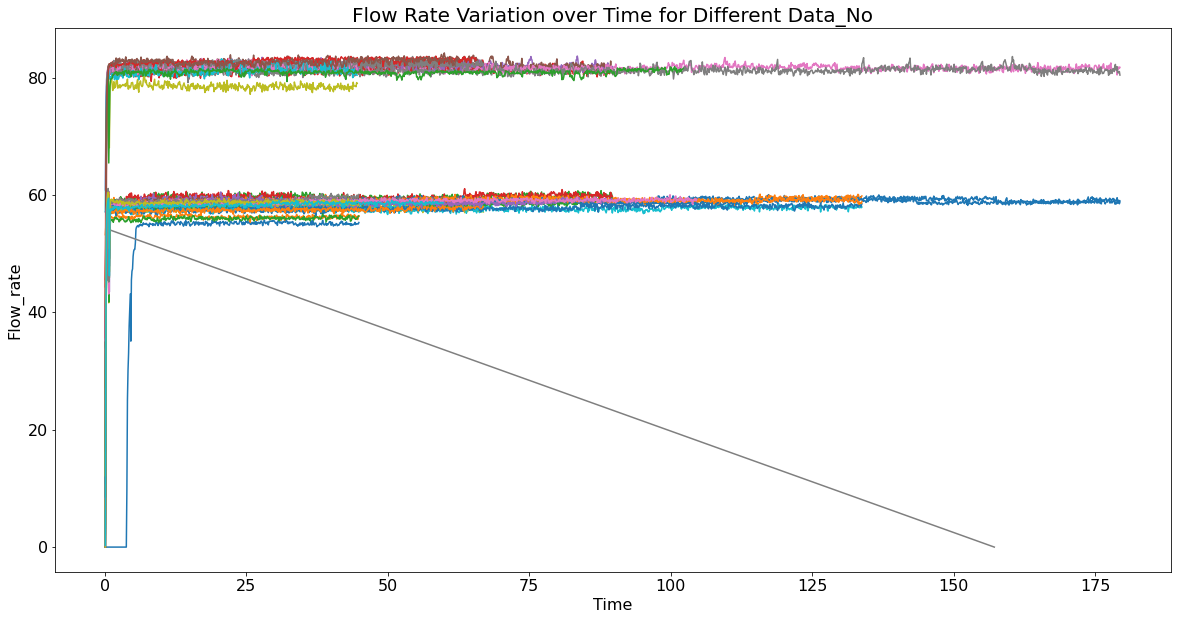

In [24]:
df=test  #copying the testing dataset
plt.figure(figsize = (20,10))  #setting the size of the plot
# Grouping the DataFrame by 'Data_No' and iterating over the groups
for data_no, df in test.groupby('Data_No'):
    plt.plot(df['Time'], df['Flow_rate'])  #creating a line plot for each group
plt.xlabel('Time', fontsize=16)   #adding a label for the x-axis
plt.ylabel('Flow_rate', fontsize=16)   #adding a label for the y-axis
plt.tick_params(axis='both', labelsize=16)  #setting the label size 
plt.title('Flow Rate Variation over Time for Different Data_No', fontsize=20)  #adding a title to the plot

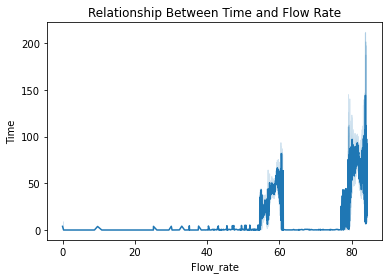

In [25]:
df=dataset  #copying the dataset
sns.lineplot(x='Flow_rate', y='Time', data=df)  #creating a line plot
plt.xlabel('Flow_rate')  #adding a label for the x-axis
plt.ylabel('Time')  #adding a label for the y-axis
plt.title('Relationship Between Time and Flow Rate')   #adding a title to the plot
plt.show()  #displaying the plot

Text(0.5, 1.0, 'Differential Pressure over Time')

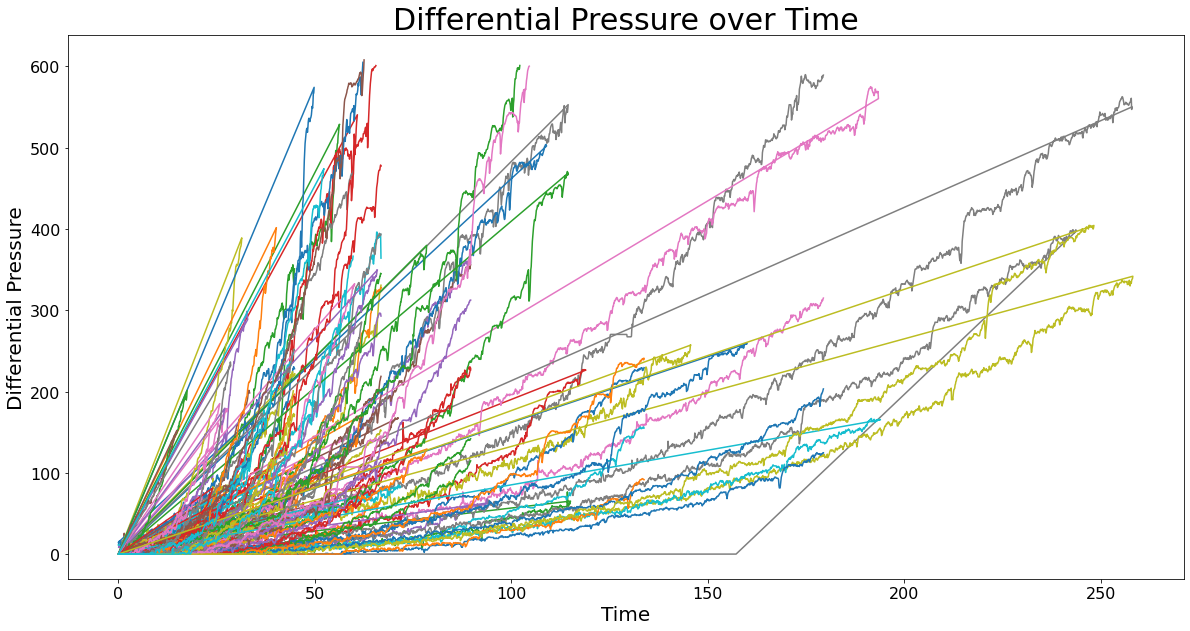

In [26]:
df=dataset #copying the dataset
plt.figure(figsize = (20,10))  #setting the size of the plot
# Grouping the DataFrame by 'Data_No' and iterating over the groups
for data_no, df in df.groupby('Data_No'):
    plt.plot(df['Time'], df['Differential_pressure'])  #creating a line plot for each group
    
plt.xlabel('Time', fontsize=20)  #adding a label for the x-axis
plt.ylabel('Differential Pressure', fontsize=20)  #adding a label for the y-axis
plt.tick_params(axis='both', labelsize=16)  #setting the font size of the tick labels
plt.title('Differential Pressure over Time', fontsize=30)  #adding a title to the plot

<AxesSubplot:xlabel='Time', ylabel='Differential_pressure'>

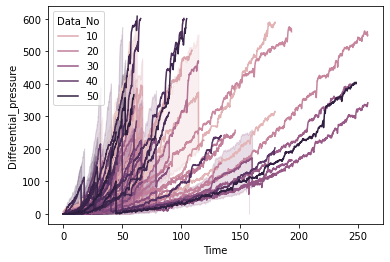

In [27]:
df=dataset  #copying the dataset
sns.lineplot(data=df, x="Time", y="Differential_pressure", hue="Data_No")  #plotting a line plot 

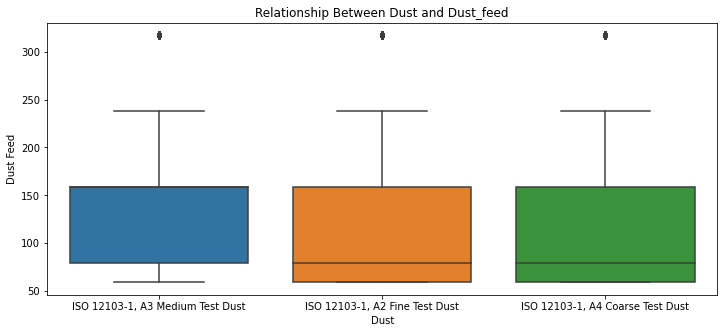

In [28]:
plt.figure(figsize=(12,5))  #setting the size of the plot
sns.boxplot(x='Dust', y='Dust_feed', data=df)  #creating a boxplot
plt.xlabel('Dust')  #adding a label for the x-axis
plt.ylabel('Dust Feed')  #adding a label for the y-axis
plt.title('Relationship Between Dust and Dust_feed')  #adding a title to the plot
plt.show()  #displaying the plot

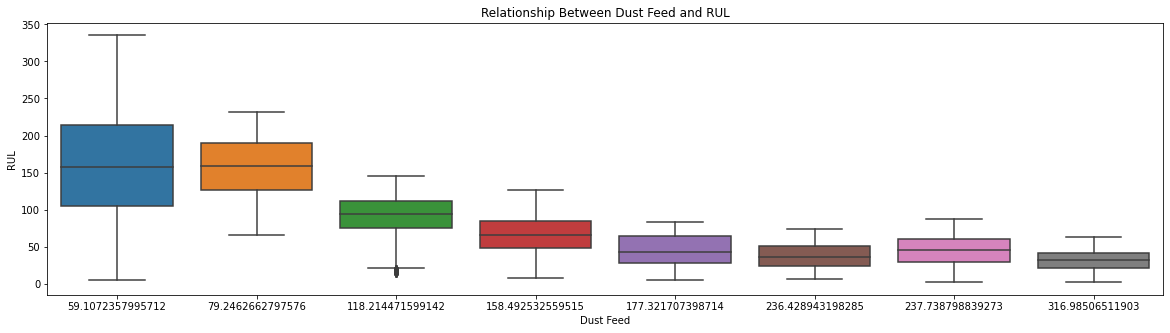

In [29]:
plt.figure(figsize=(20,5))  #setting the size of the plot
sns.boxplot(x='Dust_feed', y='RUL', data=df)  #creating a boxplot
plt.xlabel('Dust Feed')  #adding a label for the x-axis
plt.ylabel('RUL')  #adding a label for the y-axis
plt.title('Relationship Between Dust Feed and RUL')  #adding a title to the plot
plt.show()  #displaying the plot

In [30]:
data=dataset  #copying the dataset
ydata_profiling.ProfileReport(data)  #profiling the dataset

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
df = dataset  #copying the dataset

condition = df['Dust_feed'] >=250  #defining a condition to filter rows

Clean_data = df[~condition]  #applying the condition to filter the data

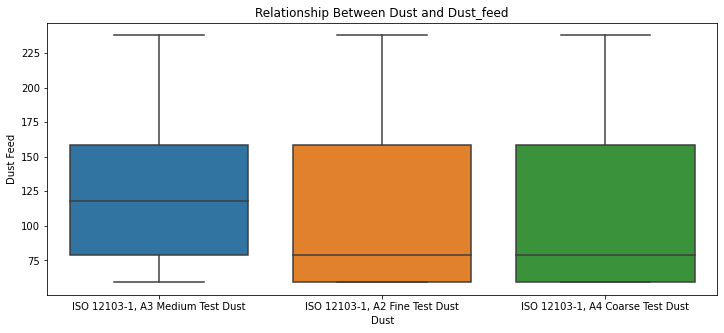

In [32]:
df=Clean_data  #copying the dataset
plt.figure(figsize=(12,5))  #setting the size of the plot
sns.boxplot(x='Dust', y='Dust_feed', data=df)  #creating a boxplot
plt.xlabel('Dust')  #adding a label for the x-axis
plt.ylabel('Dust Feed')  #adding a label for the y-axis
plt.title('Relationship Between Dust and Dust_feed')  #adding a title to the plot
plt.show()  #displaying the plot

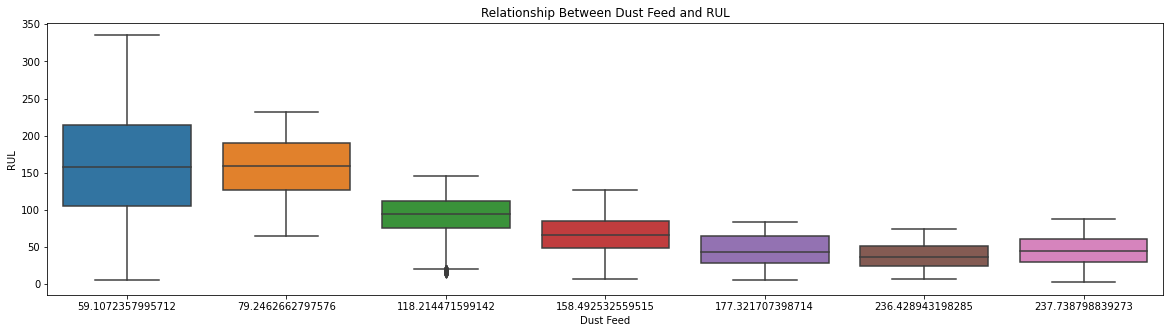

In [33]:
plt.figure(figsize=(20,5))  #setting the size of the plot
sns.boxplot(x='Dust_feed', y='RUL', data=df)  #creating a boxplot
plt.xlabel('Dust Feed')  #adding a label for the x-axis
plt.ylabel('RUL')  #adding a label for the y-axis
plt.title('Relationship Between Dust Feed and RUL')  #adding a title to the plot
plt.show()  #displaying the plot

<AxesSubplot:>

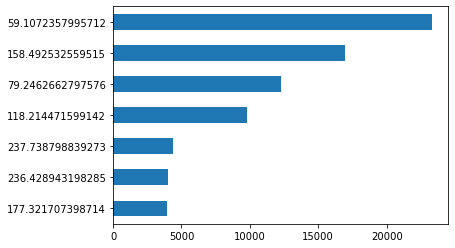

In [34]:
df['Dust_feed'].value_counts(ascending=True).plot(kind='barh')  #ploting a count plot

In [35]:
Clean_data.drop(['Dust'],axis=1,inplace=True)  #removing the Dust column from the table
Clean_data.head(10)   #reading the first 10 values of dataset after cleaning

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   RUL Source
0        1               0.271267  52.281993   0.1  236.428943  58.9  Train
1        1               0.361690  54.986671   0.2  236.428943  58.8  Train
2        1               0.000000  55.424786   0.3  236.428943  58.7  Train
3        1               2.622251  55.524146   0.4  236.428943  58.6  Train
4        1               3.888165  55.852018   0.5  236.428943  58.5  Train
5        1               4.521122  56.130203   0.6  236.428943  58.4  Train
6        1               4.521122  56.150070   0.7  236.428943  58.3  Train
7        1               4.521122  56.090457   0.8  236.428943  58.2  Train
8        1               5.787037  55.583759   0.9  236.428943  58.1  Train
9        1               4.521122  56.100397   1.0  236.428943  58.0  Train

In [36]:
#dividing the training and testing dataset
train=Clean_data.loc[Clean_data['Source']=="Train"]  #dividing the traing dataset based on Source Column
test=Clean_data.loc[Clean_data['Source']=="Test"]  #dividing the traing dataset based on Source Column

In [37]:
train.drop(['Source'],axis=1,inplace=True)  #dropping the Source column from train dataset
test.drop(['Source'],axis=1,inplace=True)  #dropping the Source column from test dataset

In [38]:
x=train.drop(['RUL'],axis=1)  #assigning the conditions for RUL prediction
y=train["RUL"]  #assigning the RUL values 

In [39]:
x.head()  #reading the first 5 values of x

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed
0        1               0.271267  52.281993   0.1  236.428943
1        1               0.361690  54.986671   0.2  236.428943
2        1               0.000000  55.424786   0.3  236.428943
3        1               2.622251  55.524146   0.4  236.428943
4        1               3.888165  55.852018   0.5  236.428943

In [40]:
y.head()  #reading the first 5 values of y 

0    58.9
1    58.8
2    58.7
3    58.6
4    58.5
Name: RUL, dtype: float64

In [41]:
y.tail()  #reading the last 5 values of y

38885    34.2
38886    34.1
38887    34.0
38888    33.9
38889    33.8
Name: RUL, dtype: float64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)  #spliting the train and test dataset in 80:20 ratio

Training RMSE: 33.10541825101208
Training R2 score: 79.67439237994206 %
Training MAE: 26.713921229605607
Training MSE: 1095.968717574444

Test RMSE: 32.65941348939825
Test R2 score: 79.72063100486598 %
Test MAE: 26.510593495256273
Test MSE: 1066.6372894714882


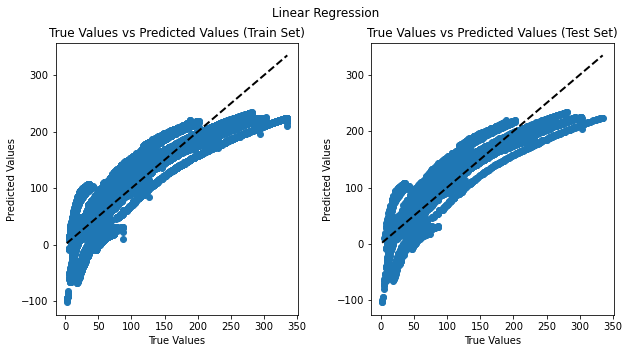

In [43]:
lr = LinearRegression()  #creating an instance for the LinearRegression model

lr.fit(x_train, y_train)  #fitting the dataset into the model

y_train_pred = lr.predict(x_train)  #making predictions on the training set

#calculating accuracy on the training set
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))  #calculating RSME for training set
train_r2_score = r2_score(y_train, y_train_pred)  #calculating R2 Score for training set
train_mae = mean_absolute_error(y_train, y_train_pred)  #calculating MAE for training set
train_mse = metrics.mean_squared_error(y_train, y_train_pred)  #calculating MSE for training set

y_test_pred = lr.predict(x_test)  #making predictions for the testing set

#calculating accuracy on the testing set
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  #calculating RSME for testing set
test_r2_score = r2_score(y_test, y_test_pred)  #calculating R2 Score for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)  #calculating MAE for testing set
test_mse = metrics.mean_squared_error(y_test, y_test_pred)  #calculating MSE for testing set

#printing the calculated values
print("Training RMSE:", train_rmse)
print("Training R2 score:", train_r2_score*100,"%")
print("Training MAE:", train_mae)
print("Training MSE:", train_mse) 
print("\nTest RMSE:", test_rmse)
print("Test R2 score:", test_r2_score*100,"%")
print("Test MAE:", test_mae)
print("Test MSE:", test_mse) 

#plotting graph for predicted values vs true values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  #setting the size for the plot
fig.subplots_adjust(wspace=0.3)  #setting the space between two plots
#plotting the predicted values vs true values for the train set
ax1.scatter(y_train, y_train_pred)  #plotting a scatter plot
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax1.set_xlabel("True Values")  #adding a label for the x-axis
ax1.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax1.set_title("True Values vs Predicted Values (Train Set)")  #adding a title for the plot
#plotting the predicted values vs true values for the test set
ax2.scatter(y_test, y_test_pred)  #plotting a scatter plot
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_xlabel("True Values")  #adding a label for the x-axis
ax2.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax2.set_title("True Values vs Predicted Values (Test Set)")  #adding a title for the plot
#adding a title to the figure
fig.suptitle("Linear Regression")
plt.show()  #ploting the graph

Training RMSE: 33.10542059912616
Training R2 score: 79.67438949661664 %
Training MAE: 26.713543716891742
Training MSE: 1095.9688730450466

Test RMSE: 32.65925097503591
Test R2 score: 79.72083282603599 %
Test MAE: 26.510056287415022
Test MSE: 1066.626674250384


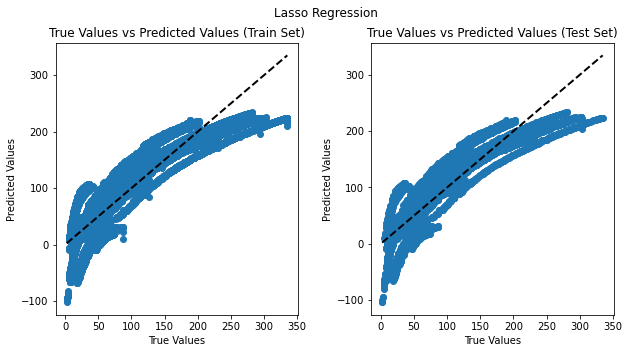

In [44]:
lasso = Lasso(alpha=0.1)  #creating an instance of the Lasso model and setting the regularization parameter alpha

lasso.fit(x_train, y_train)  #fitting the dataset into the model

y_train_pred = lasso.predict(x_train)  #making predictions on the training set

#calculating accuracy on the training set
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))  #calculating RSME for training set
train_r2_score = r2_score(y_train, y_train_pred)  #calculating R2 Score for training set
train_mae = mean_absolute_error(y_train, y_train_pred)  #calculating MAE for training set
train_mse = metrics.mean_squared_error(y_train, y_train_pred)  #calculating MSE for training set

y_test_pred = lasso.predict(x_test)  #making predictions on the testing set

#calculating accuracy on the testing set
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  #calculating RSME for testing set
test_r2_score = r2_score(y_test, y_test_pred)  #calculating R2 score for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)  #calculating MAE for testing set
test_mse = metrics.mean_squared_error(y_test, y_test_pred)  #calculating MSE for testing set

#printing the calculated values
print("Training RMSE:", train_rmse)
print("Training R2 score:", train_r2_score*100,"%")
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("\nTest RMSE:", test_rmse)
print("Test R2 score:", test_r2_score*100,"%")
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

#plotting graph for predicted values vs true values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  #setting the size for the plot
fig.subplots_adjust(wspace=0.3)  #setting the space between two plots
#plotting the predicted values vs true values for the train set
ax1.scatter(y_train, y_train_pred)  #plotting a scatter plot
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax1.set_xlabel("True Values")  #adding a label for the x-axis
ax1.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax1.set_title("True Values vs Predicted Values (Train Set)")  #adding a title for the plot
#plotting the predicted values vs true values for the test set
ax2.scatter(y_test, y_test_pred)  #plotting a scatter plot
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax2.set_xlabel("True Values")  #adding a label for the x-axis
ax2.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax2.set_title("True Values vs Predicted Values (Test Set)")  #adding a title for the plot
#adding a title to the figure
fig.suptitle("Lasso Regression")
plt.show()  #plotting the graph

Training RMSE: 16.192845574588084
Training R2 score: 95.13714043647998 %
Training MAE: 11.159736716178521
Training MSE: 262.2082478024569

Test RMSE: 15.707658474607609
Test R2 score: 95.3090524716787 %
Test MAE: 11.006468488355779
Test MSE: 246.73053475491224


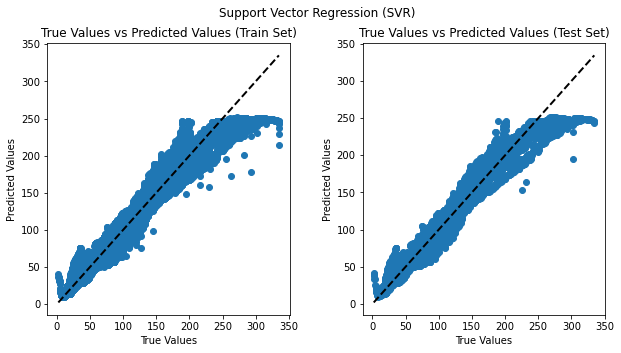

In [45]:
svr = SVR()  #creating an instance of the SVR model

svr.fit(x_train, y_train)  #fitting the dataset into the model

y_train_pred = svr.predict(x_train)  #making predictions on the training set

#calculating accuracy on the training set
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))  #calculating RSME for training set
train_r2_score = r2_score(y_train, y_train_pred)  #calculating R2 Score for training set
train_mae = mean_absolute_error(y_train, y_train_pred)  #calculating MAE for training set
train_mse = metrics.mean_squared_error(y_train, y_train_pred)  #calculating MSE for training set

y_test_pred = svr.predict(x_test)  #making predictions on the testing set

#calculating accuracy on the testing set
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  #calculating RSME for testing set
test_r2_score = r2_score(y_test, y_test_pred)  #calculating R2 Score for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)  #calculating MAE for testing set
test_mse = metrics.mean_squared_error(y_test, y_test_pred)  #calculating MSE for testing set

#printing the calculated values
print("Training RMSE:", train_rmse)
print("Training R2 score:", train_r2_score*100,"%")
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("\nTest RMSE:", test_rmse)
print("Test R2 score:", test_r2_score*100,"%")
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

#plotting graph for predicted values vs true values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  #setting the size for the plot
fig.subplots_adjust(wspace=0.3)  #setting the space between two plots
#plotting the predicted values vs true values for the train set
ax1.scatter(y_train, y_train_pred)  #plotting a scatter plot
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax1.set_xlabel("True Values")  #adding a label for the x-axis
ax1.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax1.set_title("True Values vs Predicted Values (Train Set)")  #adding a title for the plot
#plotting the predicted values vs true values for the test set
ax2.scatter(y_test, y_test_pred)  #plotting a scatter plot
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax2.set_xlabel("True Values")  #adding a label for the x-axis
ax2.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax2.set_title("True Values vs Predicted Values (Test Set)")  #adding a title for the plot
#adding a title to the figure
fig.suptitle("Support Vector Regression (SVR)")
plt.show()  #plotting the graph

Training RMSE: 0.4237218376006262
Training R2 score: 99.99667028491737 %
Training MAE: 0.09432642041546625
Training MSE: 0.17954019565965143

Test RMSE: 0.86449275170134
Test R2 score: 99.98579110229372 %
Test MAE: 0.23416698762035792
Test MSE: 0.7473477177441548


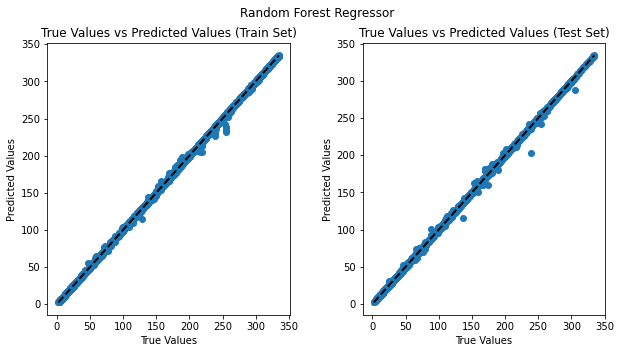

In [46]:
rf = RandomForestRegressor()  #creating an instance of the RandomForestRegressor

rf.fit(x_train, y_train)  #fitting the dataset into the model

y_train_pred = rf.predict(x_train)  #making predictions on the training set

#calculating accuracy on the training set
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))  #calculating RSME for training set
train_r2_score = r2_score(y_train, y_train_pred)  #calculating R2 Score for training set
train_mae = mean_absolute_error(y_train, y_train_pred)  #calculating MAE for training set
train_mse = metrics.mean_squared_error(y_train, y_train_pred)  #calculating MSE for training set

y_test_pred = rf.predict(x_test)  #making predictions on the testing set

#calculating accuracy on the testing set
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  #calculating RSME for testing set
test_r2_score = r2_score(y_test, y_test_pred)  #calculating R2 Score for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)  #calculating MAE for testing set
test_mse = metrics.mean_squared_error(y_test, y_test_pred)  #calculating MSE for testing set

#printing the calculated values
print("Training RMSE:", train_rmse)
print("Training R2 score:", train_r2_score*100,"%")
print("Training MAE:", train_mae)
print("Training MSE:", train_mse) 
print("\nTest RMSE:", test_rmse)
print("Test R2 score:", test_r2_score*100,"%")
print("Test MAE:", test_mae)
print("Test MSE:", test_mse) 

#plotting graph for predicted values vs true values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  #setting the size for the plot
fig.subplots_adjust(wspace=0.3)  #setting the space between two plots
#plotting the predicted values vs true values for the train set
ax1.scatter(y_train, y_train_pred)  #plotting a scatter plot
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax1.set_xlabel("True Values")  #adding a label for the x-axis
ax1.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax1.set_title("True Values vs Predicted Values (Train Set)")  #adding a title for the plot
#plotting the predicted values vs true values for the test set
ax2.scatter(y_test, y_test_pred)  #plotting a scatter plot
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  #ploting a diagonal line representing perfect predictions
ax2.set_xlabel("True Values")  #adding a label for the x-axis
ax2.set_ylabel("Predicted Values")  #adding a label for the y-axis
ax2.set_title("True Values vs Predicted Values (Test Set)")  #adding a title for the plot
#adding a title to the figure
fig.suptitle("Random Forest Regressor")
plt.show()  #plotting the graph

In [47]:
test=pd.read_csv('Test_Data.csv')  #reading the data from 'Test_Data.csv'
test.head(10)  #displaying the first 10 rows of the 'test' DataFrame

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
0        1                    0.0        0.0   0.1  236.428943   
1        1                    0.0        0.0   0.2  236.428943   
2        1                    0.0        0.0   0.3  236.428943   
3        1                    0.0        0.0   0.4  236.428943   
4        1                    0.0        0.0   0.5  236.428943   
5        1                    0.0        0.0   0.6  236.428943   
6        1                    0.0        0.0   0.7  236.428943   
7        1                    0.0        0.0   0.8  236.428943   
8        1                    0.0        0.0   0.9  236.428943   
9        1                    0.0        0.0   1.0  236.428943   

                               Dust  
0  ISO 12103-1, A3 Medium Test Dust  
1  ISO 12103-1, A3 Medium Test Dust  
2  ISO 12103-1, A3 Medium Test Dust  
3  ISO 12103-1, A3 Medium Test Dust  
4  ISO 12103-1, A3 Medium Test Dust  
5  ISO 12103-1, A3 Medium Test Dust  
6  ISO 12103-1, A3 Medium Test Dust  
7  ISO 12103-1, A3 Medium Test Dust  
8  ISO 12103-1, A3 Medium Test Dust  
9  ISO 12103-1, A3 Medium Test Dust

In [48]:
df = test  #copying the dataset

condition = df['Dust_feed'] >=250  #defining a condition to filter rows

test = df[~condition]  #applying the condition to filter the data

In [49]:
test_=test.drop(["Dust"],axis=1)  #dropping the column "Dust" from the 'test'

In [50]:
test_.head(10)  #displaying the first 10 rows of the 'test'

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed
0        1                    0.0        0.0   0.1  236.428943
1        1                    0.0        0.0   0.2  236.428943
2        1                    0.0        0.0   0.3  236.428943
3        1                    0.0        0.0   0.4  236.428943
4        1                    0.0        0.0   0.5  236.428943
5        1                    0.0        0.0   0.6  236.428943
6        1                    0.0        0.0   0.7  236.428943
7        1                    0.0        0.0   0.8  236.428943
8        1                    0.0        0.0   0.9  236.428943
9        1                    0.0        0.0   1.0  236.428943

In [51]:
RUL_pred=rf.predict(test_)  #using the trained random forest model 'rf' to predict the RUL values

In [52]:
RUL_pred  #displaying the predicted values for the target variable (RUL)

array([64.843, 64.843, 64.824, ...,  5.764,  5.753,  5.743])

In [53]:
test["RUL"] = RUL_pred  # Adding a new column "RUL" to the 'test' DataFrame and assigning the values from 'RUL_pred' to that column

In [54]:
test  # Displaying the DataFrame 'test' after adding the predicted values for the target variable

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
0            1                 0.0000   0.000000   0.1  236.428943   
1            1                 0.0000   0.000000   0.2  236.428943   
2            1                 0.0000   0.000000   0.3  236.428943   
3            1                 0.0000   0.000000   0.4  236.428943   
4            1                 0.0000   0.000000   0.5  236.428943   
...        ...                    ...        ...   ...         ...   
39415       50               359.9718  58.721877  59.4  177.321707   
39416       50               360.7856  58.699919  59.5  177.321707   
39417       50               361.5090  58.743820  59.6  177.321707   
39418       50               362.0515  58.601152  59.7  177.321707   
39419       50               366.4822  58.612131  59.8  177.321707   

                                   Dust     RUL  
0      ISO 12103-1, A3 Medium Test Dust  64.843  
1      ISO 12103-1, A3 Medium Test Dust  64.843  
2      ISO 12103-1, A3 Medium Test Dust  64.824  
3      ISO 12103-1, A3 Medium Test Dust  65.110  
4      ISO 12103-1, A3 Medium Test Dust  65.088  
...                                 ...     ...  
39415  ISO 12103-1, A4 Coarse Test Dust   5.797  
39416  ISO 12103-1, A4 Coarse Test Dust   5.797  
39417  ISO 12103-1, A4 Coarse Test Dust   5.764  
39418  ISO 12103-1, A4 Coarse Test Dust   5.753  
39419  ISO 12103-1, A4 Coarse Test Dust   5.743  

[38415 rows x 7 columns]

In [55]:
test.to_csv('predicted_result.csv') #Saving the test data as csv file

In [56]:
train = pd.read_csv('Train_Data.csv')  # Reading the data from 'Train_Data.csv' and storing it in the 'train' DataFrame

test = pd.read_csv('predicted_result.csv')  # Reading the data from 'result.csv' and storing it in the 'test' DataFrame

In [57]:
dataset = pd.concat([train, test], ignore_index=True)  # Concatenating the 'train' and 'test' DataFrames into a single DataFrame 'dataset'

In [58]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)  # Removing the 'Unnamed: 0' column from the 'dataset' DataFrame

dataset.drop(['Dust'], axis=1, inplace=True)  # Removing the 'Dust' column from the 'dataset' DataFrame

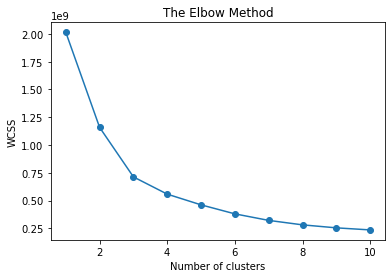

In [59]:
df = dataset #copying the dataset

wcss = []  #creating an empty list to store the WCSS values

#loop through different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)  #creating a KMeans object with 'k' clusters
    kmeans.fit(df)  #fitting the K-means algorithm to the data
    wcss.append(kmeans.inertia_)  #appending the WCSS value to the 'wcss' list

#plotting the elbow graph
plt.plot(range(1, 11), wcss, marker="o")  #plotting the WCSS values against the number of clusters
plt.xlabel("Number of clusters")  #setting the label for the x-axis
plt.ylabel("WCSS")  #setting the label for the y-axis
plt.title("The Elbow Method")  #setting the title of the plot
plt.show()  #displaying the plot

Cluster 1 has 48970 data points.
Cluster 2 has 8320 data points.
Cluster 3 has 3996 data points.
Cluster 4 has 16543 data points.


   Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   RUL  \
0        1               0.271267  52.281993   0.1  236.428943  58.9   
1        1               0.361690  54.986671   0.2  236.428943  58.8   
2        1               0.000000  55.424786   0.3  236.428943  58.7   
3        1               2.622251  55.524146   0.4  236.428943  58.6   
4        1               3.888165  55.852018   0.5  236.428943  58.5   

   Cluster_Labels  
0               1  
1               1  
2               1  
3               1  
4               1  


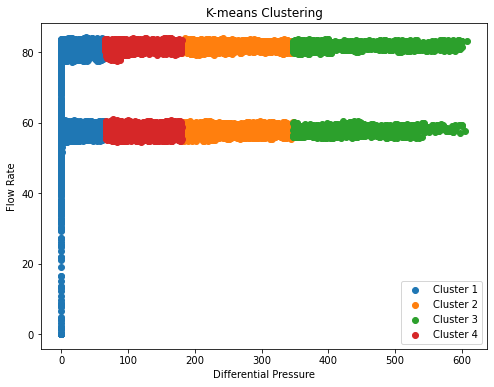

In [60]:
df = dataset  #copying the dataset 

features = ['Differential_pressure', 'Flow_rate']  #choosing the features to cluster on

k = 4  #number of clusters
kmeans = KMeans(n_clusters=k)  #creating a KMeans object with 'k' clusters
kmeans.fit(df[features])  #fitting the k-means algorithm on the selected features

cluster_labels = kmeans.labels_  #getting the cluster labels assigned by the k-means algorithm

cluster_labels_assigned = []  #creating an empty list to store the assigned labels
#looping through each cluster to assign labels based on cluster characteristics
for i in range(k):
    label = (i+1)  #assigning the label to the cluster
    cluster_labels_assigned.append(label)  #adding the assigned label to list

cluster_labels = cluster_labels.astype(int)  #converting cluster_labels to integers

dataset['Cluster_Labels'] = [cluster_labels_assigned[label] for label in cluster_labels]  #adding cluster labels to the dataset
df['Cluster_Labels'] = [cluster_labels_assigned[label] for label in cluster_labels]  #adding cluster labels to the dataset

#looping through each cluster to explore data points in each cluster
for i in range(k):
    cluster_data = df[cluster_labels == i]  #filterring the dataset to get the data points for each cluster
    print(f"Cluster {i+1} has {len(cluster_data)} data points.")  #printing the number of data points in each cluster
    
# Print the updated dataset with cluster labels
print("\n")
print(df.head())  #printing the head of the updated dataset

plt.figure(figsize=(8, 6))  #setting the size for the plot
#plotting each data point with its assigned cluster color
for i in range(k):
    cluster_data = df[cluster_labels == i]  #filterring the dataset to get the data points for each cluster
    plt.scatter(cluster_data['Differential_pressure'], cluster_data['Flow_rate'], label=f'Cluster {i+1}')  #plotting the data points for each cluster
plt.xlabel('Differential Pressure')  #setting the label for the x-axis
plt.ylabel('Flow Rate')  #setting the label for the y-axis
plt.title('K-means Clustering')  #setting the title for the plot
plt.legend()  #adding legend to the plot
plt.show()  #displaying the plot

In [61]:
X = dataset.drop(['Cluster_Labels'],axis=1)  #input features (independent variables) for classification
y = dataset["Cluster_Labels"]  #target variable (dependent variable) for classification

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  #splitting the data into training and testing sets in 80:20 ratio

Training Accuracy: 0.9300708285819829

Test Accuracy: 0.9269561865604523

F1 score: 0.9210168307710401

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      9760
           2       0.87      0.49      0.63      1691
           3       0.94      0.96      0.95       801
           4       0.79      0.93      0.85      3314

    accuracy                           0.93     15566
   macro avg       0.90      0.85      0.86     15566
weighted avg       0.93      0.93      0.92     15566



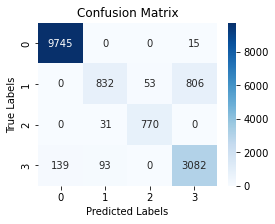

In [63]:
classifier = LogisticRegression(solver='liblinear', multi_class='ovr',random_state=40)  #creating an instance of the LogisticRegression classifier

classifier.fit(X_train, y_train)  #fitting the classifier model to the training data

y_train_pred = classifier.predict(X_train)  #predicting the training set labels

#calculating the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

y_pred = classifier.predict(X_test)  #predicting the testing set labels

#calculating the testing accuracy
accuracy = accuracy_score(y_test, y_pred)  #calculating accuracy
print(f"\nTest Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted')  #calculating the F1 score
print(f"\nF1 score: {f1}")
report = classification_report(y_test, y_pred)  #generating the classification report
print("\nClassification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)  #calculating the confusion matrix
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))  #setting the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  #creating a heatmap for confusion matrix
plt.title("Confusion Matrix")  #adding title to heatmap
plt.xlabel("Predicted Labels")  #setting x-label for heatmap
plt.ylabel("True Labels")  #setting y-label for heatmap
plt.show()  #ploting the heatmap

Training Accuracy: 0.9721022115863354

Test Accuracy: 0.9687138635487601

F1 score: 0.9691044268378498

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98      9760
           2       0.96      0.96      0.96      1691
           3       0.95      0.97      0.96       801
           4       0.90      0.98      0.94      3314

    accuracy                           0.97     15566
   macro avg       0.95      0.97      0.96     15566
weighted avg       0.97      0.97      0.97     15566



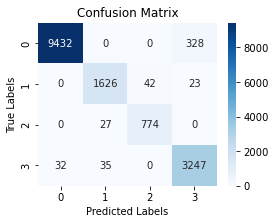

In [64]:
classifier = GaussianNB()  #creating an instance for the GaussianNB classifier

classifier.fit(X_train, y_train)  #fitting the classifier model to the training data

y_train_pred = classifier.predict(X_train)  #predicting the training set labels

#calculating the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

y_pred = classifier.predict(X_test)  #predicting the testing set labels

#calculating the testing accuracy
accuracy = accuracy_score(y_test, y_pred)  #calculating accuracy
print(f"\nTest Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted')  #calculating the F1 score
print(f"\nF1 score: {f1}")
report = classification_report(y_test, y_pred)  #generating the classification report
print("\nClassification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)  #calculating the confusion matrix
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))  #setting the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  #creating a heatmap for confusion matrix
plt.title("Confusion Matrix")  #adding title to heatmap
plt.xlabel("Predicted Labels")  #setting x-label for heatmap
plt.ylabel("True Labels")  #setting y-label for heatmap
plt.show()  #ploting the heatmap

Training Accuracy: 1.0

Test Accuracy: 0.999935757420018

F1 score: 0.9999357620678975

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9760
           2       1.00      1.00      1.00      1691
           3       1.00      1.00      1.00       801
           4       1.00      1.00      1.00      3314

    accuracy                           1.00     15566
   macro avg       1.00      1.00      1.00     15566
weighted avg       1.00      1.00      1.00     15566



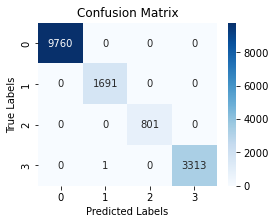

In [65]:
classifier = RandomForestClassifier(random_state=40)  #creating an instance for the RandomForestClassifier

classifier.fit(X_train, y_train)  #fitting the classifier model to the training data

y_train_pred = classifier.predict(X_train)  #predicting the training set labels

#calculating the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

y_pred = classifier.predict(X_test)  #predicting the testing set labels

#calculating the testing accuracy
accuracy = accuracy_score(y_test, y_pred)  #calculating accuracy
print(f"\nTest Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted')   #calculating the F1 score
print(f"\nF1 score: {f1}")
report = classification_report(y_test, y_pred)  #generating the classification report
print("\nClassification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)  #calculating the confusion matrix
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))  #setting the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  #creating a heatmap for confusion matrix
plt.title("Confusion Matrix")  #adding title to heatmap
plt.xlabel("Predicted Labels")  #setting x-label for heatmap
plt.ylabel("True Labels")  #setting y-label for heatmap
plt.show()  #ploting the heatmap

Training Accuracy: 1.0

Test Accuracy: 0.999935757420018

F1 score: 0.9999357620678975

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9760
           2       1.00      1.00      1.00      1691
           3       1.00      1.00      1.00       801
           4       1.00      1.00      1.00      3314

    accuracy                           1.00     15566
   macro avg       1.00      1.00      1.00     15566
weighted avg       1.00      1.00      1.00     15566



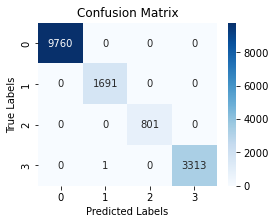

In [66]:
classifier = DecisionTreeClassifier(random_state=40)  #creating an instance for the DecisionTreeClassifier

classifier.fit(X_train, y_train)  #fitting the classifier model to the training data

y_train_pred = classifier.predict(X_train)  #predicting the training set labels

#calculating the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

y_pred = classifier.predict(X_test)  #predicting the testing set labels

#calculating the testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)  #calculating accuracy
print(f"\nTest Accuracy: {test_accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted')   #calculating the F1 score
print(f"\nF1 score: {f1}")
report = classification_report(y_test, y_pred)  #generating the classification report
print("\nClassification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)  #calculating the confusion matrix
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))  #setting the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  #creating a heatmap for confusion matrix
plt.title("Confusion Matrix")  #adding title to heatmap
plt.xlabel("Predicted Labels")  #setting x-label for heatmap
plt.ylabel("True Labels")  #setting y-label for heatmap
plt.show()  #ploting the heatmap

In [67]:
classifier = LogisticRegression(solver='liblinear', multi_class='ovr',random_state=40)  #creating an instance for LogisticRegression classifier

scores = cross_val_score(classifier, X_train, y_train, cv=5)  #performing k-fold cross-validation

#printing the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.93061913 0.92764796 0.92507829 0.92780276 0.92250241]
Mean accuracy: 0.9267301100967134


In [68]:
classifier = GaussianNB() #creating an instance for GaussianNB classifier

scores = cross_val_score(classifier, X_train, y_train, cv=5)  #performing k-fold cross-validation

#printing the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.97028828 0.97358066 0.97261704 0.97261484 0.97012528]
Mean accuracy: 0.9718452218762076


In [69]:
classifier = RandomForestClassifier(random_state=40)  #creating an instance for RandomForestClassifier

scores = cross_val_score(classifier, X_train, y_train, cv=5)  #performing k-fold cross-validation

#printing the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1.         0.9999197  1.         1.         0.99991969]
Mean accuracy: 0.9999678779361056


In [70]:
classifier = DecisionTreeClassifier(random_state=40)  #creating an instance of the DecisionTreeClassifier

scores = cross_val_score(classifier, X_train, y_train, cv=5)  #performing k-fold cross-validation

#printing the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.99991969]
Mean accuracy: 0.999983938323161
